<a href="https://colab.research.google.com/github/Bharathwajrk123/DL_Project/blob/main/DL0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model

In [ ]:
data = pd.read_csv("/content/Epileptic Seizure Recognition.csv")
data = data.drop(columns=['Unnamed'])
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y[y > 1] = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_CNN_model.keras', save_best_only=True, monitor='val_loss')
]
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=128, validation_split=0.2, callbacks=callbacks,verbose = 1)

Epoch 1/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.7527 - loss: 0.4629 - val_accuracy: 0.9511 - val_loss: 0.1262
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9547 - loss: 0.1090 - val_accuracy: 0.9543 - val_loss: 0.1007
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9607 - loss: 0.0972 - val_accuracy: 0.9582 - val_loss: 0.0943
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.9652 - loss: 0.0858 - val_accuracy: 0.9582 - val_loss: 0.0922
Epoch 5/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9709 - loss: 0.0724 - val_accuracy: 0.9668 - val_loss: 0.0722
Epoch 6/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9760 - loss: 0.0636 - val_accuracy: 0.9728 - val_loss: 0.0622
Epoch 7/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9848 - loss: 0.0439 - val_accuracy: 0.9745 - val_loss: 0.0634
Epoch 8/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9876 - loss: 0.0376 - val_accuracy: 0.

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy * 100, "%")
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
predictions = model.predict(X_test_scaled)
predictions = (predictions > 0.5).astype(int)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9749 - loss: 0.0572
Loss: 0.055314116179943085
Accuracy: 97.78260588645935 %
Test Loss: 0.0553, Test Accuracy: 0.9778
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1828
           1       0.95      0.94      0.95       472

    accuracy                           0.98      2300
   macro avg       0.97      0.96      0.97      2300
weighted avg       0.98      0.98      0.98      2300

[[1805   23]
 [  28  444]]


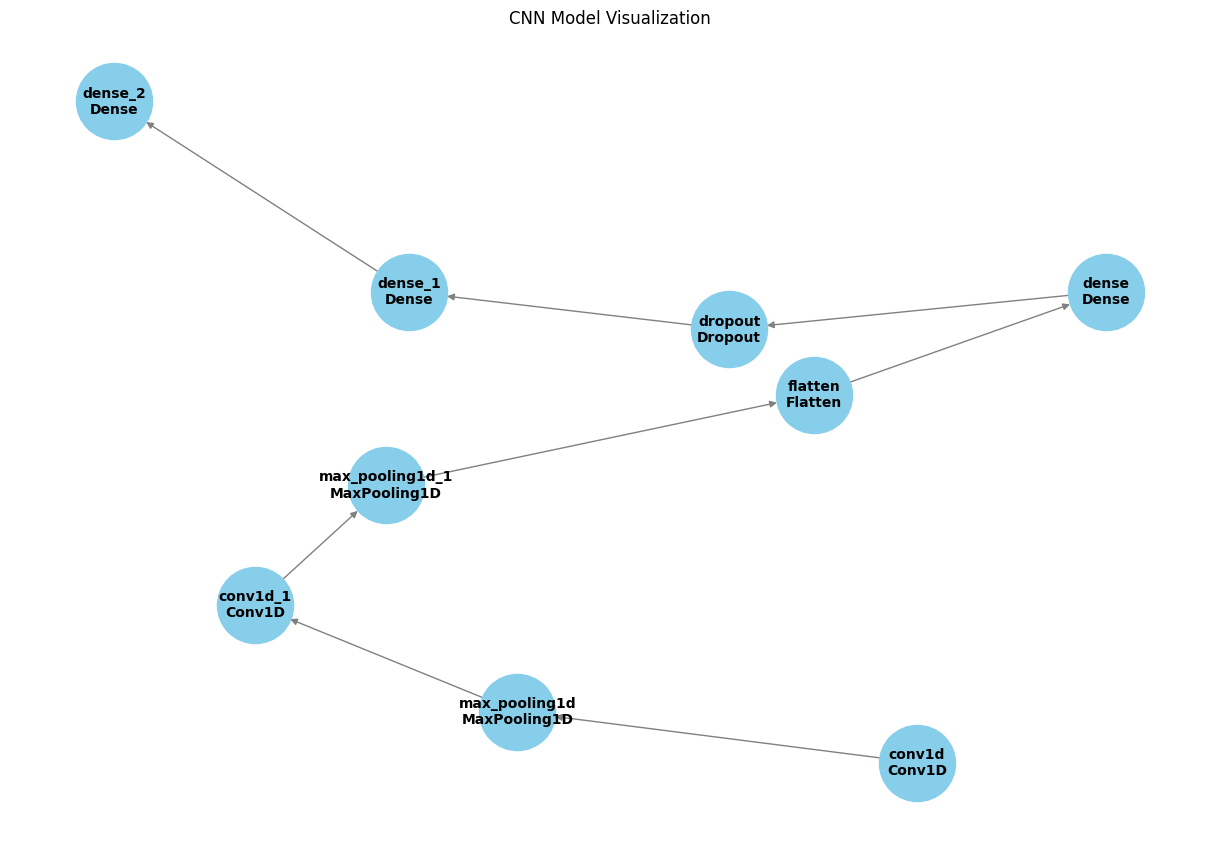

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_model(model, file_name="cnn_model.png"):
    G = nx.DiGraph()


    for i, layer in enumerate(model.layers):
        G.add_node(i, label=f"{layer.name}\n{layer.__class__.__name__}")

    for i in range(len(model.layers) - 1):
        G.add_edge(i, i + 1)

    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', font_color='black', edge_color='gray')


    plt.title("CNN Model Visualization")

    plt.savefig(file_name, format="png")


    plt.show()

visualize_model(model, file_name="cnn_model.png")

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0     0.9847    0.9874    0.9861      1828
           1     0.9507    0.9407    0.9457       472

    accuracy                         0.9778      2300
   macro avg     0.9677    0.9640    0.9659      2300
weighted avg     0.9778    0.9778    0.9778      2300



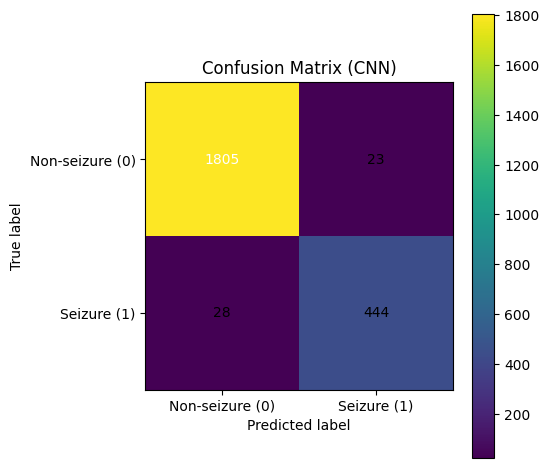

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_proba = model.predict(X_test_scaled).ravel()
y_pred  = (y_proba >= 0.5).astype(int)
print(classification_report(y_test, y_pred, digits=4))
cm = confusion_matrix(y_test, y_pred)
import numpy as np
plt.figure(figsize=(5.5,5))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix (CNN)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0,1], ['Non-seizure (0)', 'Seizure (1)'])
plt.yticks([0,1], ['Non-seizure (0)', 'Seizure (1)'])
th = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > th else "black")
plt.colorbar()
plt.tight_layout()
plt.savefig('cnn_confusion_matrix.png', dpi=300)
plt.show()

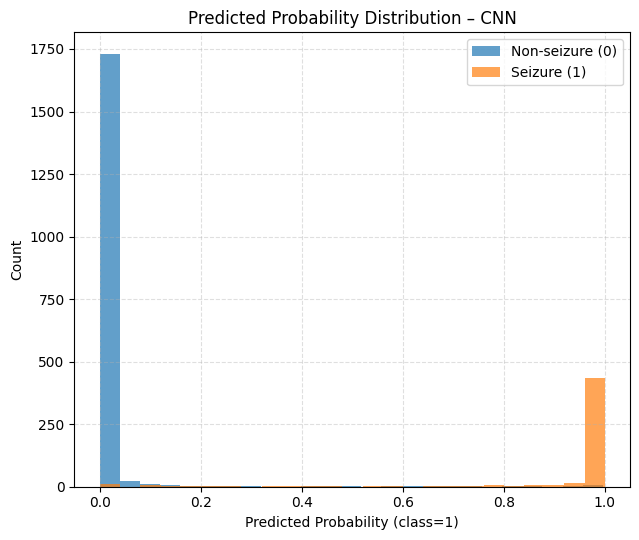

In [ ]:
plt.figure(figsize=(6.5,5.5))
plt.hist(y_proba[y_test==0], bins=25, alpha=0.7, label='Non-seizure (0)')
plt.hist(y_proba[y_test==1], bins=25, alpha=0.7, label='Seizure (1)')
plt.xlabel('Predicted Probability (class=1)')
plt.ylabel('Count')
plt.title('Predicted Probability Distribution – CNN')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('cnn_prob_hist.png', dpi=300)
plt.show()